In [1]:
from discrete import *
import numpy as np 
from numpy.random import randint, rand
import matplotlib.pyplot as plt


In [2]:
def count_infected(pop):
    return sum(p.is_infected() for p in pop)

def count_recovered(pop):
    return sum(p.is_recovered() for p in pop)

def count_susc(pop):
    return sum(p.is_susceptible() for p in pop)

def run_simulation(b, k, N=1_000, T=20):
    """
    return the number of people enlightened at time T
    """
    
    pop = [Agent() for i in range(N)] # our population
    pop[0].infect()
    counts = [count_infected(pop)]
    for t in range(T):
    # update the population
        for i in range(N):
            if pop[i].is_infected():
                for j in range(N):
                    if pop[j].is_susceptible():
                        if rand() < b:
                            pop[j].infect()        
                if rand() < k:
                    pop[i].recover()   
        counts.append(count_infected(pop))
    susc = count_susc(pop)
    inf =  count_infected(pop)
    rec = count_recovered(pop)
    cts = [susc, inf, rec]
    return cts, counts 



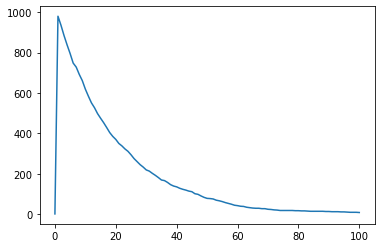

<Figure size 432x288 with 0 Axes>

In [3]:
cts, counts = run_simulation(0.01, 0.05, T=100, N=1000)
plt.plot(counts)
plt.show()
plt.clf()

In [5]:
cts

[0, 8, 992]

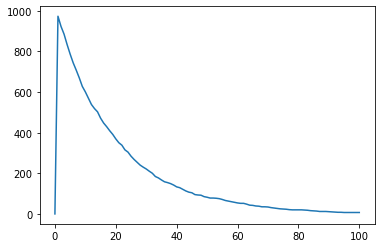

<Figure size 432x288 with 0 Axes>

In [4]:
# alternate way to do the plotting
T = 100 # number of days to simulate
b = 0.01
k = 0.05
N = 1000

pop = [Agent() for i in range(N)]
pop[0].infect()
counts = [count_infected(pop)]
for t in range(T):
    # update the population
    for i in range(N):
        if pop[i].is_infected():
            for j in range(N):
                if pop[j].is_susceptible():
                    if rand() < b:
                        pop[j].infect()        
            if rand() < k:
                pop[i].recover()                    
    # add to our counts
    counts.append(count_infected(pop))

plt.plot(counts)
plt.show()
plt.clf()